**In this notebook, the goal is to predict up and down movement of the stock market.**

$Steps:$
- Compute relevant indcators to process the data
- Process the data
- Use processed data as input for the deep neural network algorithm
- Predict up and down movements



In [1]:
#pip install ta

In [2]:
# Importation of packages
import yfinance as yf
import pandas as pd
import numpy as np
import ta
from deep_neural_network import *

axis=1 and keepdims=True
[[3]
 [7]]
axis=1 and keepdims=False
[3 7]
axis=0 and keepdims=True
[[4 6]]
axis=0 and keepdims=False
[4 6]


In [3]:
'''import sys
import os

# Obtenir le répertoire de travail actuel
current_dir = os.getcwd()

# Construire le chemin vers le répertoire 'repo'
repo_dir = os.path.join(current_dir, 'repo')
repo_dir2 = os.path.join(current_dir, 'repo/datasets')
repo_dir3 = os.path.join(current_dir, 'repo/images')
# Ajouter 'repo' au sys.path
sys.path.append(repo_dir)
sys.path.append(repo_dir2)
sys.path.append(repo_dir3)

# Importer toutes les fonctions du module neural_net
from neural_net import *
'''

"import sys\nimport os\n\n# Obtenir le répertoire de travail actuel\ncurrent_dir = os.getcwd()\n\n# Construire le chemin vers le répertoire 'repo'\nrepo_dir = os.path.join(current_dir, 'repo')\nrepo_dir2 = os.path.join(current_dir, 'repo/datasets')\nrepo_dir3 = os.path.join(current_dir, 'repo/images')\n# Ajouter 'repo' au sys.path\nsys.path.append(repo_dir)\nsys.path.append(repo_dir2)\nsys.path.append(repo_dir3)\n\n# Importer toutes les fonctions du module neural_net\nfrom neural_net import *\n"

## 1 - Functions to compute the needed indicators

In [4]:

def calculate_indicators(data):
    
    # Compute indicators
    indicators = {}

    # Candlestick Pattern
    data['Mean Candlestick Pattern'] = ta.trend.sma_indicator(data['Close'], window=10).iloc[-1]
    data['Candlestick Pattern'] = data['Close']
    # data['Mean Candlestick Pattern'] = np.mean(abs(data['Open'] - data['Close'])/(data['High'] - data['Low']))
    # data['Candlestick Pattern'] = abs(data['Open'].tail(1) - data['Close'].tail(1))/(data['High'].tail(1) - data['Low'].tail(1))
        # mean always > that current with this
    # print(data['Mean Candlestick Pattern'])
    # print(data['Candlestick Pattern']) 
    
    # 10 Days price
    data['10 Days price'] = np.mean(data['Close'].tail(10).tolist())

    # 20 Days price
    data['20 Days price'] = np.mean(data['Close'].tail(20).tolist())
    
    # Simple Moving Average (SMA)
    #print(ta.trend.sma_indicator(data['Close'], window=10))
    data['SMA'] = ta.trend.sma_indicator(data['Close'], window=1).iloc[-1]

    # Exponential Moving Average (EMA)
    data['EMA'] = ta.trend.ema_indicator(data['Close'], window=1).iloc[-1]

    # Momentum (MOM)
    data['MOM'] = ta.momentum.roc(data['Close'], window=10).iloc[-1]

    # Stochastic Fast Moving 14 Days
    data['STCK Fast Moving 14 days price'] = ta.momentum.stoch(data['High'], data['Low'], data['Close'], window=14, smooth_window=3).iloc[-1]

    # Stochastic Slow Moving 14 Days
    data['STCD Slow Moving 14 days price'] = ta.momentum.stoch_signal(data['High'], data['Low'], data['Close'], window=14, smooth_window=3).iloc[-1]

    # Relative Strength Index (RSI)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14).iloc[-1]

    # MACD
    data['MACD'] = ta.trend.macd(data['Close'])
    data['MACD_SIGNAL'] = ta.trend.macd_signal(data['Close'])
    data['MACD Fast Moving 9'] = data['MACD'].iloc[-1]
    data['MACD Slow Moving 26 days price'] = data['MACD_SIGNAL'].iloc[-1]

    # R (We will use an incator as the Average True Range ATR for approximation)
    data['ATR'] = ta.volatility.average_true_range(data['High'], data['Low'], data['Close'], window=14)
    data['R'] = data['ATR'].iloc[-1]

    # Accumulation/Distribution Line (A/D)
    data['A/D'] = ta.volume.acc_dist_index(data['High'], data['Low'], data['Close'], data['Volume'])
    data['A/D'] = data['A/D'].iloc[-1]

    # Commodity Channel Index (CCI)
    data['CCI'] = ta.trend.cci(data['High'], data['Low'], data['Close'], window=20)
    data['CCI 20 Days'] = data['CCI'].iloc[-1]

    return data.tail(1)

# Test example
ticker = 'GOOGL'

# Retrive data of the latest 30 days for the ticker
#data = yf.download(ticker, period='30d', interval='1d')

# Retrive data of the latest 10000 days for the ticker
period = '500d'
data1 = yf.download(ticker, period=period, interval='1d') # We only have 20 years so 4980 data

dataset = calculate_indicators(data1)
pd.DataFrame(dataset)


/Users/nossa/miniconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Mean Candlestick Pattern,Candlestick Pattern,10 Days price,20 Days price,...,RSI,MACD,MACD_SIGNAL,MACD Fast Moving 9,MACD Slow Moving 26 days price,ATR,R,A/D,CCI,CCI 20 Days
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-31,171.860001,173.059998,169.440002,172.5,172.5,37626600,175.266,172.5,175.266,172.6705,...,55.674542,3.508929,4.326335,3.508929,4.326335,3.472439,3.472439,5.333775e+08,-14.730006,-14.730006


In [5]:
data1

,Open,High,Low,Close,Adj Close,Volume,Mean Candlestick Pattern,Candlestick Pattern,10 Days price,20 Days price,...,RSI,MACD,MACD_SIGNAL,MACD Fast Moving 9,MACD Slow Moving 26 days price,ATR,R,A/D,CCI,CCI 20 Days
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-06,116.704498,119.347000,116.164001,116.820503,116.820503,33542000,175.266,116.820503,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.000000,3.472439,5.333775e+08,NaN,-14.730006
2022-06-07,115.480499,117.691002,115.052002,117.149498,117.149498,31590000,175.266,117.149498,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.000000,3.472439,5.333775e+08,NaN,-14.730006
2022-06-08,116.761497,118.570503,116.599998,117.194000,117.194000,26108000,175.266,117.194000,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.000000,3.472439,5.333775e+08,NaN,-14.730006
2022-06-09,116.327499,118.299004,114.776001,114.835503,114.835503,25798000,175.266,114.835503,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.000000,3.472439,5.333775e+08,NaN,-14.730006
2022-06-10,112.445000,113.278999,110.365997,111.161499,111.161499,41452000,175.266,111.161499,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.000000,3.472439,5.333775e+08,NaN,-14.730006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,174.979996,175.770004,173.649994,174.990005,174.990005,16572500,175.266,174.990005,175.266,172.6705,...,55.674542,4.644896,4.818276,3.508929,4.326335,3.557454,3.472439,5.333775e+08,75.862641,-14.730006
2024-05-28,174.449997,177.270004,174.369995,176.399994,176.399994,20572200,175.266,176.399994,175.266,172.6705,...,55.674542,4.549551,4.764531,3.508929,4.326335,3.510494,3.472439,5.333775e+08,86.505099,-14.730006
2024-05-29,175.429993,176.839996,174.720001,175.899994,175.899994,23388700,175.266,175.899994,175.266,172.6705,...,55.674542,4.383119,4.688249,3.508929,4.326335,3.411173,3.472439,5.333775e+08,75.007820,-14.730006


## 2 - Algorithm to identify trend in data
**We use a combination of candlestick data and technical indicators**

In [6]:
def find_trend(data):
    """
    Determines the trend in the data based on given technical indicators and candlestick patterns.
    
    Parameters:
    data (DataFrame): DataFrame containing the technical indicators and candlestick patterns.
    
    Returns:
    list: A list containing the trend ('Up' or 'Down') for each technical indicator.
    """
    trends = []

    # Technical Indicator 1: SMA
    #print(data['SMA'].values)
    #print(data['10 Days price'].values )
    #print(data['Candlestick Pattern'].values)
    #print(data['Mean Candlestick Pattern'].values)
    if data['SMA'].values > data['20 Days price'].values and data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values:
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 2: EMA (10 days)
    if (data['EMA'].values > data['10 Days price'].values) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 3: MOM (10 days) 
    if (data['MOM'].values > data['10 Days price'].values) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 4: STCK Fast vs Slow
    if (data['STCK Fast Moving 14 days price'].values > data['STCD Slow Moving 14 days price'].values) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 5: RSI
    if (data['RSI'].values > 30) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 6: MACD Fast vs Slow
    if (data['MACD Fast Moving 9'].values > data['MACD Slow Moving 26 days price'].values) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 7: R
    if (data['R'].values < -80) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 8: A/D
    if (data['A/D'].values < -100) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 9: CCI
    if (data['CCI 20 Days'].values > 100) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    # Technical Indicator 10: EMA (20 days)
    if (data['EMA'].values > data['20 Days price'].values) & (data['Candlestick Pattern'].values > data['Mean Candlestick Pattern'].values):
        trends.append('Up')
    else:
        trends.append('Down')

    return trends

# Test example
ticker = 'GOOGL'
period_int = 500
period = str(period_int) + 'd'
data2 = yf.download(ticker, period=period, interval='1d') # We only have 20 years so 4980 data
dataset = calculate_indicators(data2)
trends = find_trend(dataset)
print(trends)


/Users/nossa/miniconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

['Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down']


In [7]:
data2.iloc[:10]

,Open,High,Low,Close,Adj Close,Volume,Mean Candlestick Pattern,Candlestick Pattern,10 Days price,20 Days price,...,RSI,MACD,MACD_SIGNAL,MACD Fast Moving 9,MACD Slow Moving 26 days price,ATR,R,A/D,CCI,CCI 20 Days
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-06,116.704498,119.347000,116.164001,116.820503,116.820503,33542000,175.266,116.820503,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-07,115.480499,117.691002,115.052002,117.149498,117.149498,31590000,175.266,117.149498,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-08,116.761497,118.570503,116.599998,117.194000,117.194000,26108000,175.266,117.194000,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-09,116.327499,118.299004,114.776001,114.835503,114.835503,25798000,175.266,114.835503,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-10,112.445000,113.278999,110.365997,111.161499,111.161499,41452000,175.266,111.161499,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-13,106.786499,108.791496,106.119003,106.392502,106.392502,47252000,175.266,106.392502,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-14,106.535004,107.924500,105.800003,106.715500,106.715500,33706000,175.266,106.715500,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-15,108.544998,111.423500,107.669502,109.764503,109.764503,39698000,175.266,109.764503,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006
2022-06-16,107.221001,108.648499,105.138000,106.033501,106.033501,51684000,175.266,106.033501,175.266,172.6705,...,55.674542,NaN,NaN,3.508929,4.326335,0.0,3.472439,5.333775e+08,NaN,-14.730006


In [8]:
def conv_trend_int(trends): # transform 'Up' and 'Down' into 1 and 0 respectively
    T = []
    for i in trends:
        if i == 'Up':
            T.append(1)
        else:
            T.append(0)           
    return T

def final_trend(T): # fetch the final trend according to the incators
    return round(np.mean(T))


# Test example
period_int = 100 # integer value for the period
period = str(period_int) + 'd'
ticker = 'GOOGL'
data2 = yf.download(ticker, period=period, interval='1d') # We only have 20 years so 4980 data
dataset = calculate_indicators(data2)
trends = find_trend(dataset)
input = conv_trend_int(trends) # serve as input for the DNN model
final_trend(input) # serve as label for the input data 

/Users/nossa/miniconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


0

## 3 - Retrive data with their label

In [9]:
def retrieve_data(data):
    X = np.zeros((11, period_int - 20)) # 10 components (10 indicators, 1 label)
    for i in range(X.shape[1]): # period - 20 data (need the 20 precedent value to compute the current value)
        data_int = data.iloc[:20 + i].copy() # intermediary data, variable, taking the 20 + 1 first values of data
        #print(data_int)
        dataset = calculate_indicators(data_int)
        #print(pd.DataFrame(dataset))
        trends = find_trend(dataset)
        #print(trends)
        input = conv_trend_int(trends)
        #print(input)
        label = final_trend(input)
        #print(label)
        #print(X)
        X[:10,i] = input
        X[10,i] = label
    return X

data = retrieve_data(data2)

In [10]:
X = np.array(data[:10, :])
y = np.array(data[10,:]).reshape(1,-1)

## 4 - Training the Deep Neural Network

Cost after iteration 0: 0.6931374190301789
Cost after iteration 100: 0.6895782226729591
Cost after iteration 200: 0.6871108749672663
Cost after iteration 300: 0.6853684759664006
Cost after iteration 400: 0.6840931821359628
Cost after iteration 500: 0.6830708809452709
Cost after iteration 600: 0.6821135279958567
Cost after iteration 700: 0.6810004898572083
Cost after iteration 800: 0.6794045176465044
Cost after iteration 900: 0.6768222411014165
Cost after iteration 1000: 0.6724453380827269
Cost after iteration 1100: 0.6650279662157206
Cost after iteration 1200: 0.652934916074168
Cost after iteration 1300: 0.634688458889032
Cost after iteration 1400: 0.6102617000984057
Cost after iteration 1500: 0.5820995771683962
Cost after iteration 1600: 0.5538176642908138
Cost after iteration 1700: 0.5275402689086105
Cost after iteration 1800: 0.5033576872536102
Cost after iteration 1900: 0.48060276806044294
Cost after iteration 2000: 0.4587263539162984
Cost after iteration 2100: 0.43749566967169007


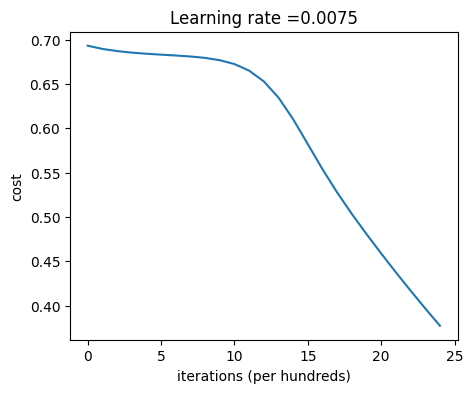

In [11]:
parameters = two_layer_model(X, y, layers_dims = (10, 10, 1), num_iterations = 2500, print_cost=True)

In [12]:
predictions_train = predict(X, y, parameters)

Accuracy: 0.8999999999999999


Cost after iteration 0: 0.693202
Cost after iteration 100: 0.689639
Cost after iteration 200: 0.687170
Cost after iteration 300: 0.685441
Cost after iteration 400: 0.684196
Cost after iteration 500: 0.683238
Cost after iteration 600: 0.682396
Cost after iteration 700: 0.681480
Cost after iteration 800: 0.680242
Cost after iteration 900: 0.678290
Cost after iteration 1000: 0.674991
Cost after iteration 1100: 0.669336
Cost after iteration 1200: 0.659873
Cost after iteration 1300: 0.644956
Cost after iteration 1400: 0.623668
Cost after iteration 1500: 0.597205
Cost after iteration 1600: 0.568899
Cost after iteration 1700: 0.541814
Cost after iteration 1800: 0.516936
Cost after iteration 1900: 0.493839
Cost after iteration 2000: 0.471844
Cost after iteration 2100: 0.450576
Cost after iteration 2200: 0.429905
Cost after iteration 2300: 0.409792
Cost after iteration 2400: 0.390242


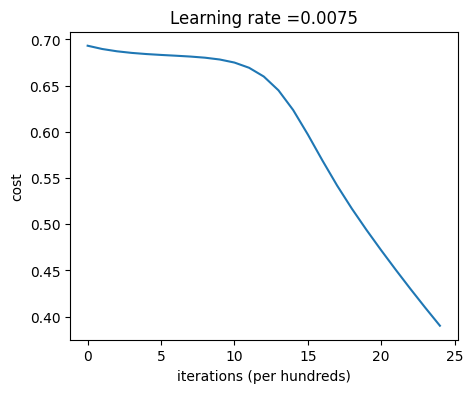

In [13]:
parameters = L_layer_model(X, y, layers_dims = (10, 10, 1), num_iterations = 2500, print_cost=True)

In [14]:
predictions_train = predict(X, y, parameters)

Accuracy: 0.8999999999999999
